In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from math import ceil
import seaborn as sns

%matplotlib inline

In [11]:
# Modifies the options of pandas' display
pd.set_option("display.max_columns", None) # show all columns

In [12]:
# Read the data file
original_df = pd.read_csv("data/isaiah_dataset_13_feb_version.csv").fillna("")

# converting 'dir_he' and 'dir_he_dss' from float to int 

original_df["dir_he"] = original_df["dir_he"].astype(str)
original_df["dir_he"] = original_df["dir_he"].replace("1.0", "1").replace("0.0", "0")

original_df["dir_he"] = original_df["dir_he"].astype(str)
original_df["dir_he"] = original_df["dir_he"].replace("1.0", "1").replace("0.0", "0")

original_df["dir_he"] = original_df["dir_he"].astype(str)
original_df["dir_he"] = original_df["dir_he"].replace("1.0", "1").replace("0.0", "0")

# Display the fist five lines of the dataset
original_df.head(5)

,verb_id,lex,scroll,book,chapter,verse_num,gcons_verb,gcons_verse,sign_info,stem,tense,gcons_clause,subject,complement,cmpl_lex,cmpl_translation,dir_he,cmpl_constr,cmpl_nt,cmpl_anim,cmpl_det,cmpl_indiv,cmpl_complex,motion_type,preposition_1,preposition_2,preposition_3,preposition_4,comments
0,212256,BW>[,MT,Isaiah,1,12,TB>W,KJ TB>W L R>WT PNJ MJ BQC Z>T M JDKM RMS XYRJ,,qal,impf,KJ TB>W,,no complement,no complement,,,,,,,,,,,,,,
1,1895059,BW>[,1Qisaa,Isaiah,1,12,TB>W,KJ> TB>W L R>WT PNJ MJ BQC ZW>T M JDKM L RMWS ...,000 0000 0 0000 0000 00 000 0000 0 00000 0 000...,qal,impf,KJ> TB>W,,no complement,no complement,,0,,,,,,,,,,,,
2,212269,BW>[,MT,Isaiah,1,13,HBJ>,L> TWSJPW HBJ> MNXT CW> QVRT TW<BH HJ> LJ XDC ...,,hif,infc,HBJ> MNXT CW>,,no complement,no complement,,,,,,,,,,,,,,
3,1895075,BW>[,1Qisaa,Isaiah,1,13,HBJ>,LW> TWSJPW L HBJ> MNXT CW> QVRT TW<BH HJ> LJ X...,000 000000 0 0000 0000 000 0000 00000 000 000 ...,hifil,infc,L HBJ> MNXT CW>,,no complement,no complement,,0,,,,,,,,,,,,
4,212315,SWR[,MT,Isaiah,1,16,HSJRW,RXYW HZKW HSJRW R< M<LLJKM M NGD <JNJ XDLW HR<,,hif,impv,HSJRW R< M<LLJKM M NGD <JNJ,,M NGD <JNJ,MN NGD/ <JN/,from before my eyes,0,prep,bopa,inanim,det,subs,complex,fictive,MN,,,,


In [13]:
# Keep only the verbs (rows) that have a complement
df = original_df[original_df.complement != "no complement"]

df_explo = df[[
    'verb_id',
    'lex', 
    'scroll', 
    'book', 
    'chapter', 
    'verse_num',
    'complement', 
    'cmpl_lex', 
    'cmpl_translation',
    'dir_he', 
    'cmpl_constr', 
    'cmpl_anim', 
    'cmpl_det',
    'cmpl_indiv', 
    'cmpl_complex',]]

df_explo.to_csv("data/isaiah_complements.csv", index=False)
data = df_explo

In [14]:
# Display the filtered dataframe or its length
df_explo.head(5)
#len(df_cmpl)

,verb_id,lex,scroll,book,chapter,verse_num,complement,cmpl_lex,cmpl_translation,dir_he,cmpl_constr,cmpl_anim,cmpl_det,cmpl_indiv,cmpl_complex
4,212315,SWR[,MT,Isaiah,1,16,M NGD <JNJ,MN NGD/ <JN/,from before my eyes,0,prep,inanim,det,subs,complex
5,1895129,SWR[,1Qisaa,Isaiah,1,16,M NGD <JNJ,MN NGD/ <JN/,from before my eyes,0,prep,inanim,det,subs,complex
8,212418,BW>[,MT,Isaiah,1,23,>LJHM,>L,to them,0,prep,anim,det,prsf,simple
9,1895234,BW>[,1Qisaa,Isaiah,1,23,>LJHM,>L,to them,0,prep,anim,det,prsf,simple
10,212437,CWB[,MT,Isaiah,1,25,<LJK,<L,against you,0,prep,anim,det,prsf,simple


In [15]:
### DATA EXPLORATION BY DATA VISUALISATIONS ###

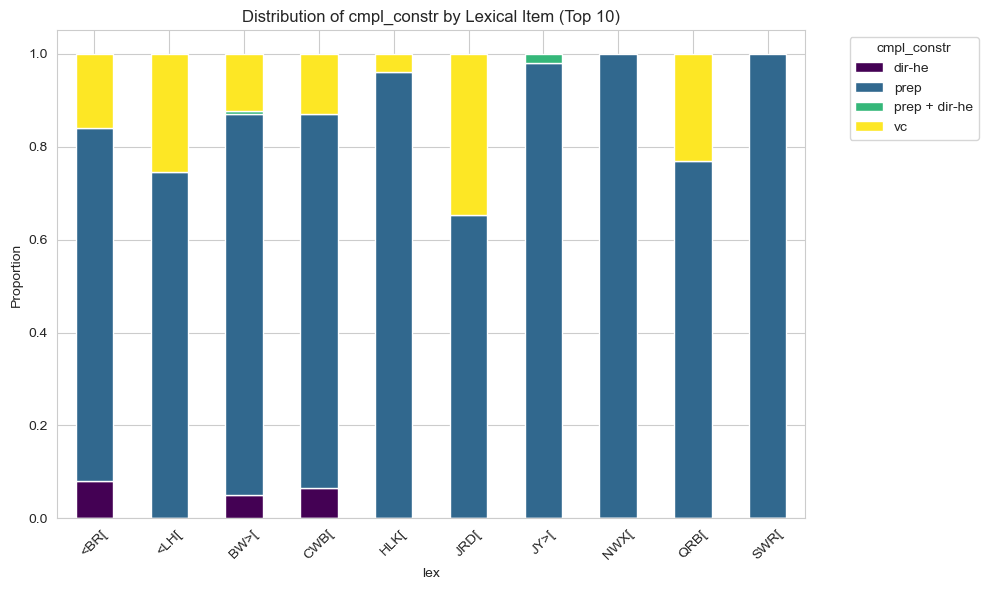

In [18]:
# Identify the most frequent lexical items in 'lex'
top_lex = data['lex'].value_counts().head(10).index.tolist()

# Filter the dataset to include only the most frequent lexical items
filtered_data = data[data['lex'].isin(top_lex)]

# Plotting the distribution of cmpl_constr for the top lexical items
plot_stacked_bar(filtered_data, 'lex', 'cmpl_constr', 'Distribution of cmpl_constr by Lexical Item (Top 10)')

In [21]:
data['lex'].value_counts()

BW>[     177
<LH[      59
HLK[      51
JY>[      49
CWB[      46
SWR[      25
<BR[      25
JRD[      23
NWX[      21
QRB[      13
NPL[      12
NWS[      12
GLH[       8
MWC[       8
PNH[       7
RWY[       6
T<H[       5
<WP[       4
NGC[       4
SBB[       4
XSH[       4
NS<[       3
BRX[       3
<WZ[       2
CQQ[       2
XLP[       2
PF<[       2
NHR[       2
CWR=[      2
Name: lex, dtype: int64

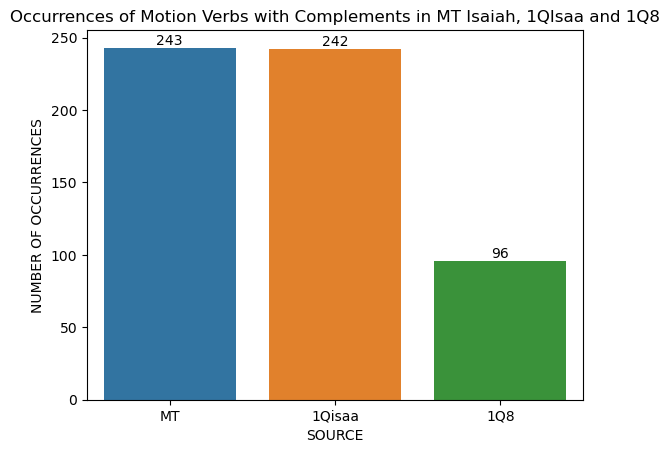

In [9]:
### OCCURRENCES PER SCROLL ###

# Count the occurrence for each scroll
occurrences_per_scroll = df["scroll"].value_counts().reset_index()
occurrences_per_scroll.columns =  ["scroll", "count"]

# Create a bar chart
ax = sns.barplot(x="scroll", y="count", data=occurrences_per_scroll)

# Add labels and title
plt.xlabel("SOURCE")
plt.ylabel("NUMBER OF OCCURRENCES")
plt.title("Occurrences of Motion Verbs with Complements in MT Isaiah, 1QIsaa and 1Q8")

# Iterate over the bars and use the `text` function to add annotations
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2.,  # x position (center of the bar)
            p.get_height(),  # y position (top of the bar)
            f'{int(p.get_height())}',  # text (count)
            ha='center',  # horizontal alignment
            va='bottom')  # vertical alignment

plt.show()

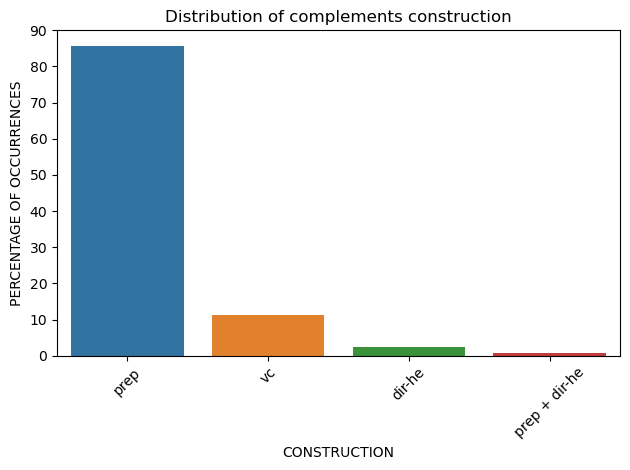

In [12]:
### OCCURRENCES PER CONSTRUCTION - DISTRIBUTION ###

# Count the occurrence for each scroll
occurrences_per_constr = df["cmpl_constr"].value_counts(normalize=True).reset_index()
occurrences_per_constr.columns =  ["construction", "percentage"]

# Convert the 'percentage' column to actual percentages
occurrences_per_constr['percentage'] *= 100

# Create a bar chart
ax = sns.barplot(x="construction", y="percentage", data=occurrences_per_constr)

# Add labels and title
plt.xlabel("CONSTRUCTION")
plt.ylabel("PERCENTAGE OF OCCURRENCES")
plt.title("Distribution of complements construction")


plt.xticks(rotation=45)  # Rotate the construction labels for better readability
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()

In [13]:
### RELATIONSHIP BETWEEN COMPLEMENT CONSTRUCTION AND DEFINITENESS ### 

# Filter out rows where cmpl_det is 'na'
filtered_data = data[data['cmpl_det'] != 'na']

# Explore the distribution of the values of cmpl_det
cmpl_det_distribution = filtered_data['cmpl_det'].value_counts(normalize=True) * 100  # Get the percentage distribution

cmpl_det_distribution

det    78.719723
und    21.280277
Name: cmpl_det, dtype: float64

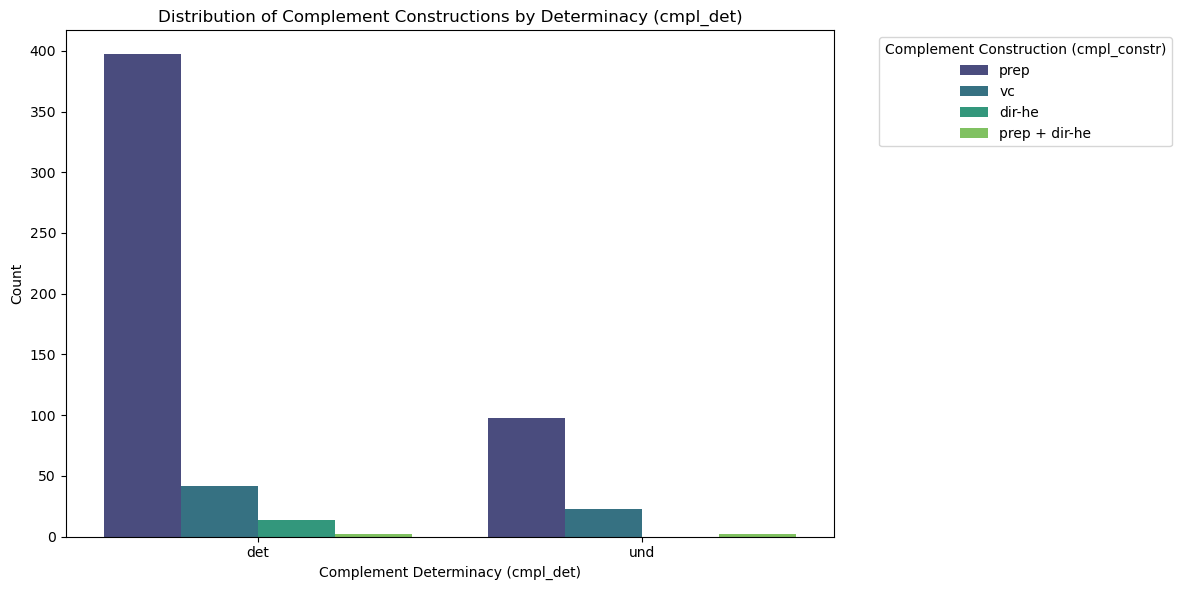

In [14]:
# Visualize the distribution of cmpl_constr for each value of cmpl_det
plt.figure(figsize=(12, 6))
sns.countplot(x='cmpl_det', hue='cmpl_constr', data=filtered_data, palette='viridis')
plt.title('Distribution of Complement Constructions by Determinacy (cmpl_det)')
plt.xlabel('Complement Determinacy (cmpl_det)')
plt.ylabel('Count')
plt.legend(title='Complement Construction (cmpl_constr)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

C:\Users\perez\AppData\Local\Temp\ipykernel_15424\1133660386.py:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  percentage_df = filtered_data.groupby(['cmpl_det', 'cmpl_constr'], group_keys=True).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).reset_index(name='Percentage')


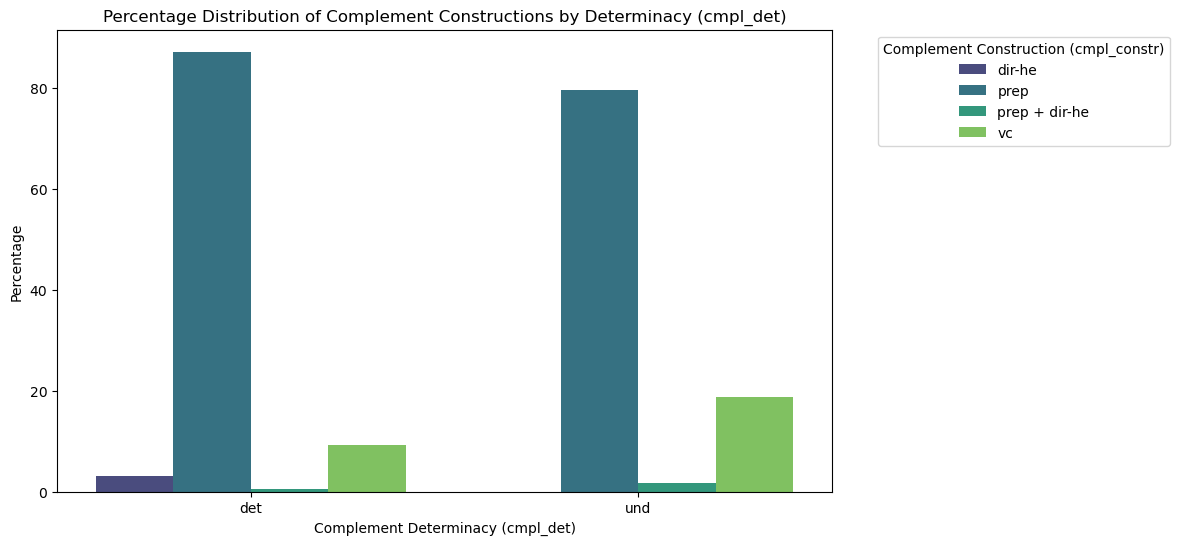

In [17]:
# Calculate the percentage distribution of cmpl_constr within each cmpl_det category
percentage_df = filtered_data.groupby(['cmpl_det', 'cmpl_constr'], group_keys=True).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).reset_index(name='Percentage')

# Plot the grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='cmpl_det', y='Percentage', hue='cmpl_constr', data=percentage_df, palette='viridis')
plt.title('Percentage Distribution of Complement Constructions by Determinacy (cmpl_det)')
plt.xlabel('Complement Determinacy (cmpl_det)')
plt.ylabel('Percentage')
plt.legend(title='Complement Construction (cmpl_constr)', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

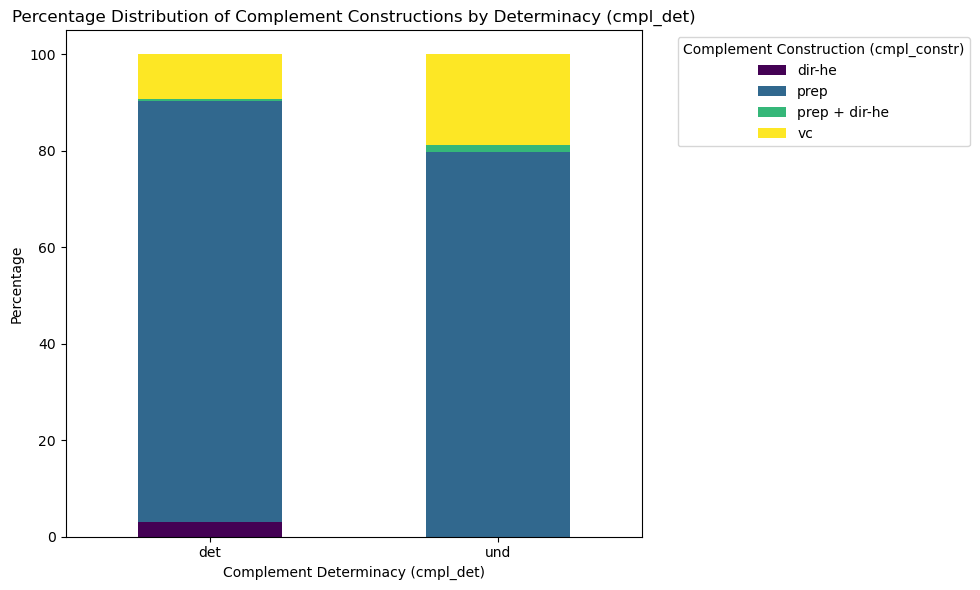

In [18]:
# Create a normalized cross-tabulation
crosstab_normalized = pd.crosstab(filtered_data['cmpl_det'], filtered_data['cmpl_constr'], normalize='index') * 100

# Plot the normalized stacked bar chart
crosstab_normalized.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Percentage Distribution of Complement Constructions by Determinacy (cmpl_det)')
plt.xlabel('Complement Determinacy (cmpl_det)')
plt.ylabel('Percentage')
plt.legend(title='Complement Construction (cmpl_constr)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)  # Keep the x-axis labels horizontal for readability
plt.tight_layout()

plt.show()

In [17]:
### BAR PLOT FUNCTION ###

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Define a function to create stacked bar charts for easier reusedef plot_stacked_bar(data, x_var, hue_var, title):

def plot_stacked_bar(data, x_var, hue_var, title):
    """
    Creates a stacked bar chart.

    Parameters:
    - data: pandas DataFrame containing the data.
    - x_var: str, name of the variable to be plotted on the x-axis.
    - hue_var: str, name of the variable used for color encoding, creating the stacks.
    - title: str, the title of the plot.
    """
    # Create a cross-tabulation
    crosstab = pd.crosstab(data[x_var], data[hue_var], normalize='index')

    # Plot the stacked bar chart
    crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
    plt.title(title)
    plt.xlabel(x_var)
    plt.ylabel('Proportion')
    plt.legend(title=hue_var, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()

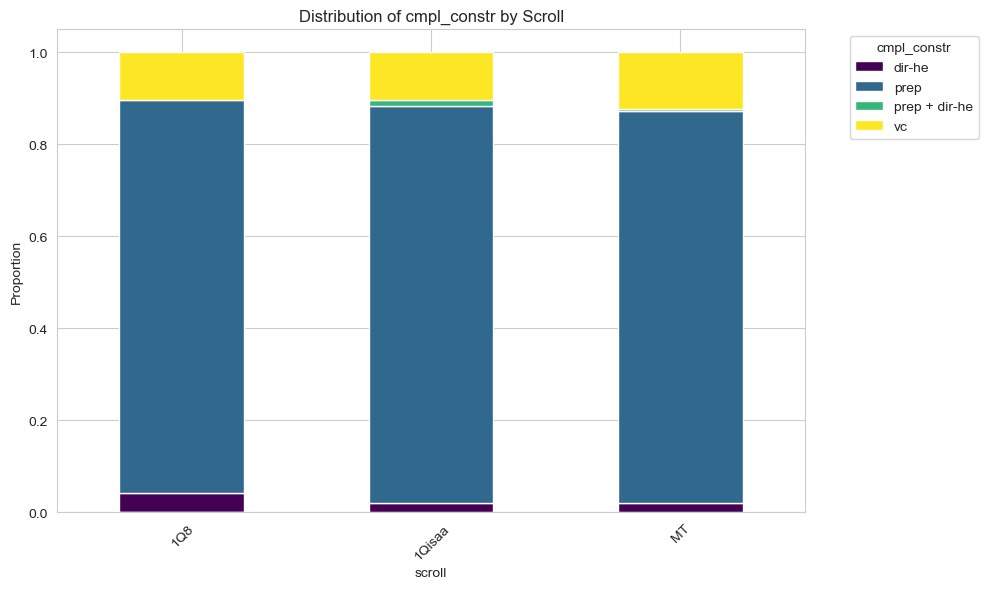

In [22]:
plot_stacked_bar(data, 'scroll', 'cmpl_constr', 'Distribution of cmpl_constr by Scroll')

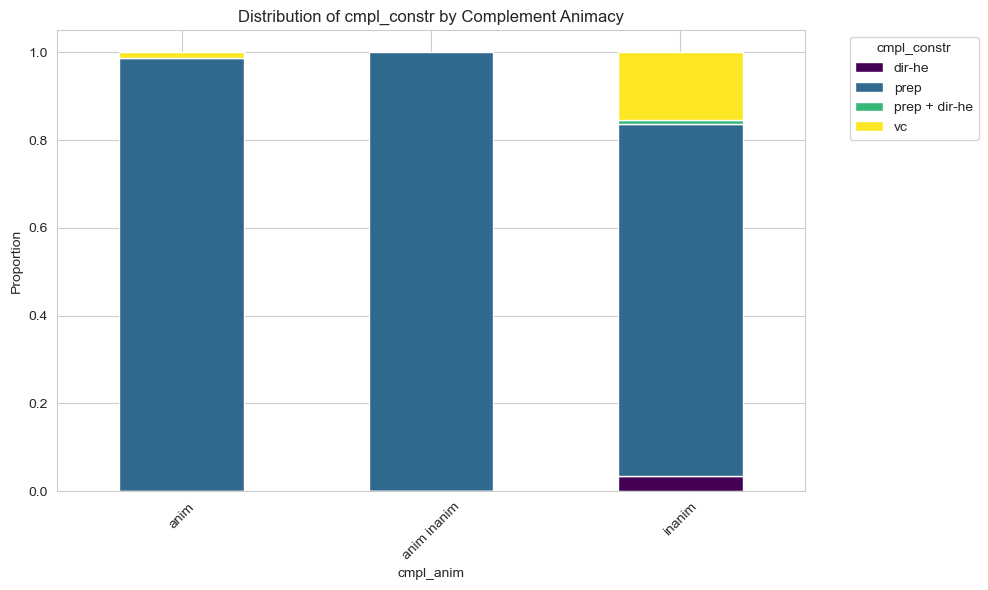

In [23]:
plot_stacked_bar(data, 'cmpl_anim', 'cmpl_constr', 'Distribution of cmpl_constr by Complement Animacy')

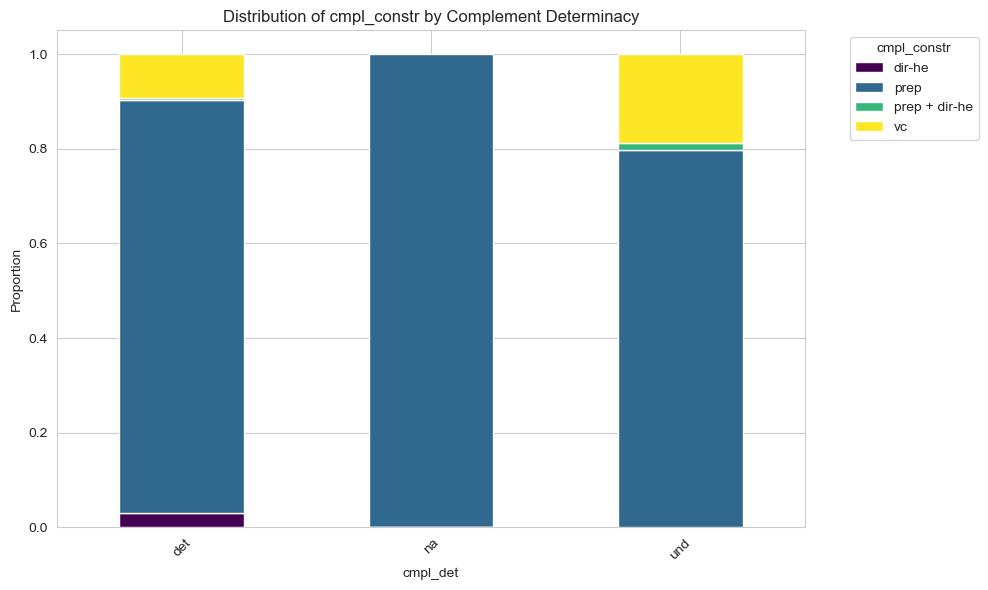

In [24]:
plot_stacked_bar(data, 'cmpl_det', 'cmpl_constr', 'Distribution of cmpl_constr by Complement Determinacy')

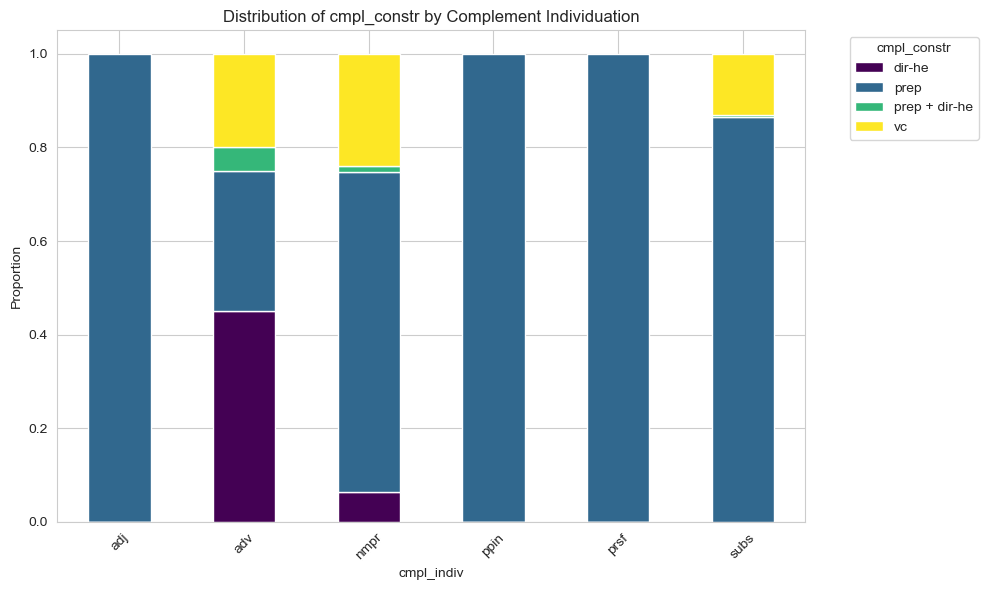

In [25]:
plot_stacked_bar(data, 'cmpl_indiv', 'cmpl_constr', 'Distribution of cmpl_constr by Complement Individuation')

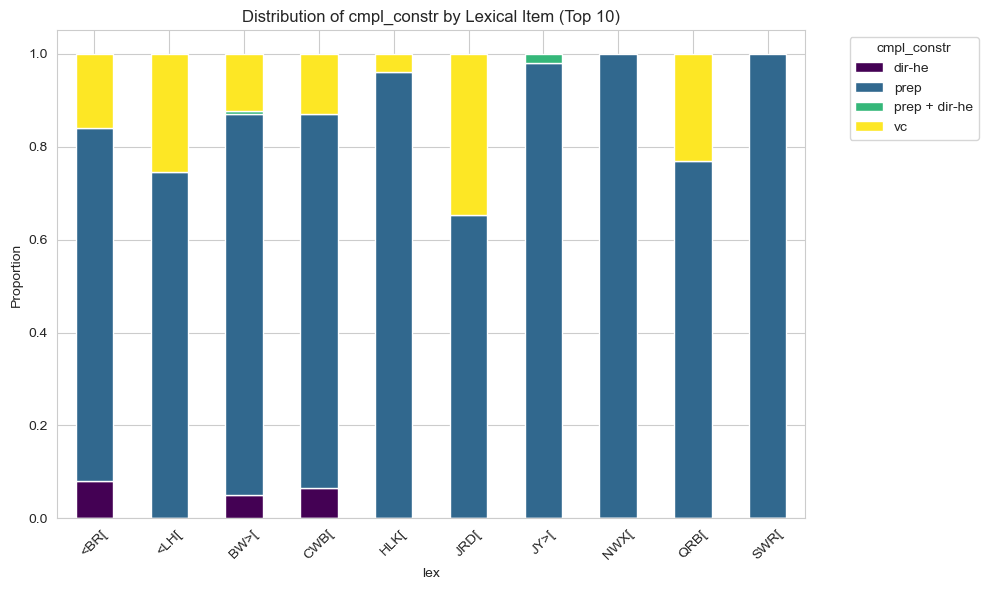

In [26]:
# Identify the most frequent lexical items in 'lex'
top_lex = data['lex'].value_counts().head(10).index.tolist()

# Filter the dataset to include only the most frequent lexical items
filtered_data = data[data['lex'].isin(top_lex)]

# Plotting the distribution of cmpl_constr for the top lexical items
plot_stacked_bar(filtered_data, 'lex', 'cmpl_constr', 'Distribution of cmpl_constr by Lexical Item (Top 10)')

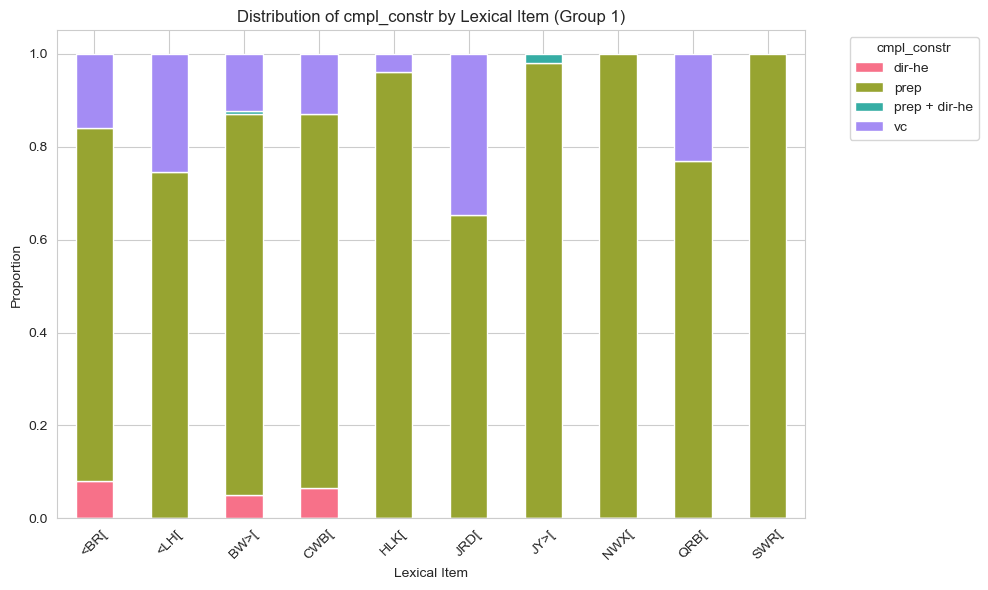

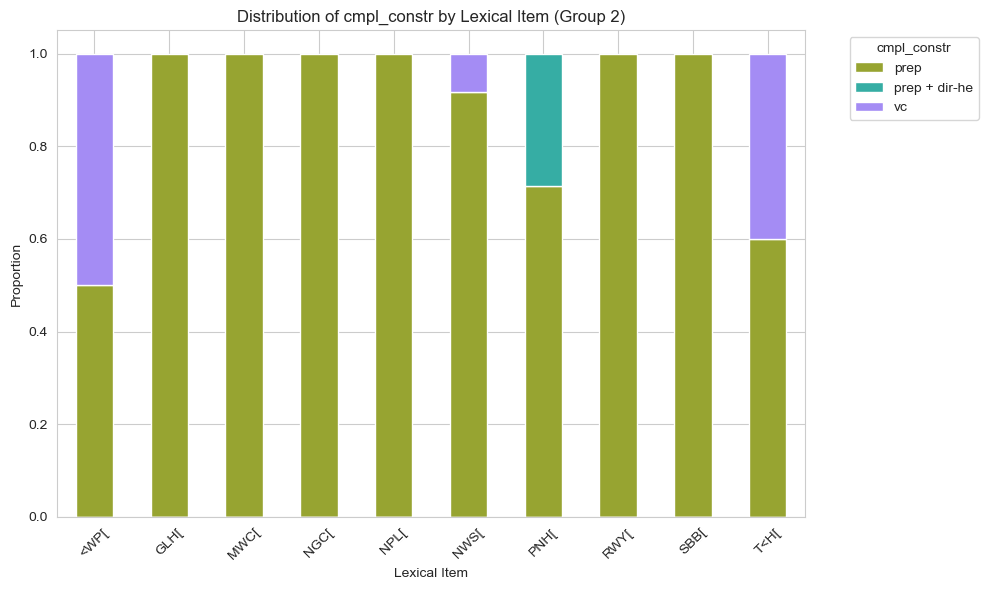

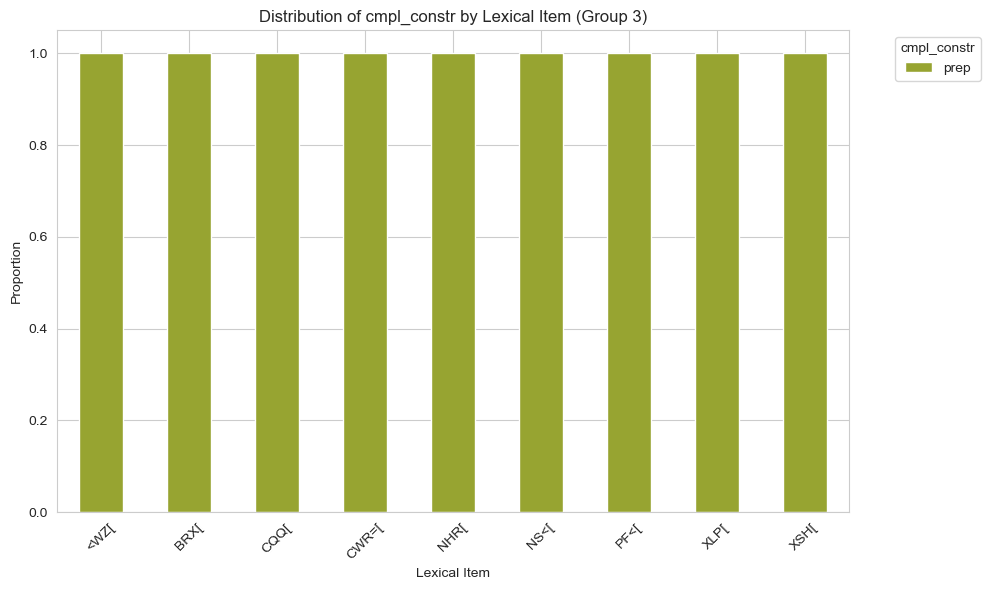

In [31]:
### VISUALISE ALL THE LEXEMES AND THE COMPLEMENT CONSTRUCTIONS PER LEXEME ###

# Get unique lexical items sorted by their frequency (most frequent first)
unique_lex = data['lex'].value_counts().index.tolist()

# Determine the number of plots needed (each plot contains 10 lexical items)
num_plots = ceil(len(unique_lex) / 10)

# Identify all unique values of cmpl_constr and sort them for consistency
unique_cmpl_constr = sorted(data['cmpl_constr'].unique())

# Define a custom color palette (using seaborn's color palette options or custom colors)
# Here, we use seaborn's "husl" palette, but you can choose any or define your own colors
color_palette = sns.color_palette("husl", len(unique_cmpl_constr))
cmpl_constr_colors = dict(zip(unique_cmpl_constr, color_palette))

# Update the plotting function to use the custom color palette
def plot_lex_groups_custom_colors(group, group_number, palette):
    """
    Creates a stacked bar chart for a group of lexical items using a custom color palette.

    Parameters:
    - group: list, the current group of lexical items to plot.
    - group_number: int, the identifier for the group (used for the plot title).
    - palette: dict, a dictionary mapping cmpl_constr values to specific colors.
    """
    group_data = data[data['lex'].isin(group)]
    crosstab = pd.crosstab(group_data['lex'], group_data['cmpl_constr'], normalize='index')

    # Create the plot with the custom palette
    crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), color=[palette[x] for x in crosstab.columns])
    plt.title(f'Distribution of cmpl_constr by Lexical Item (Group {group_number})')
    plt.xlabel('Lexical Item')
    plt.ylabel('Proportion')
    plt.legend(title='cmpl_constr', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()

# Iterate over the groups and plot with custom colors
for i in range(num_plots):
    start_index = i * 10
    end_index = start_index + 10
    lex_group = unique_lex[start_index:end_index]
    plot_lex_groups_custom_colors(lex_group, i + 1, cmpl_constr_colors)

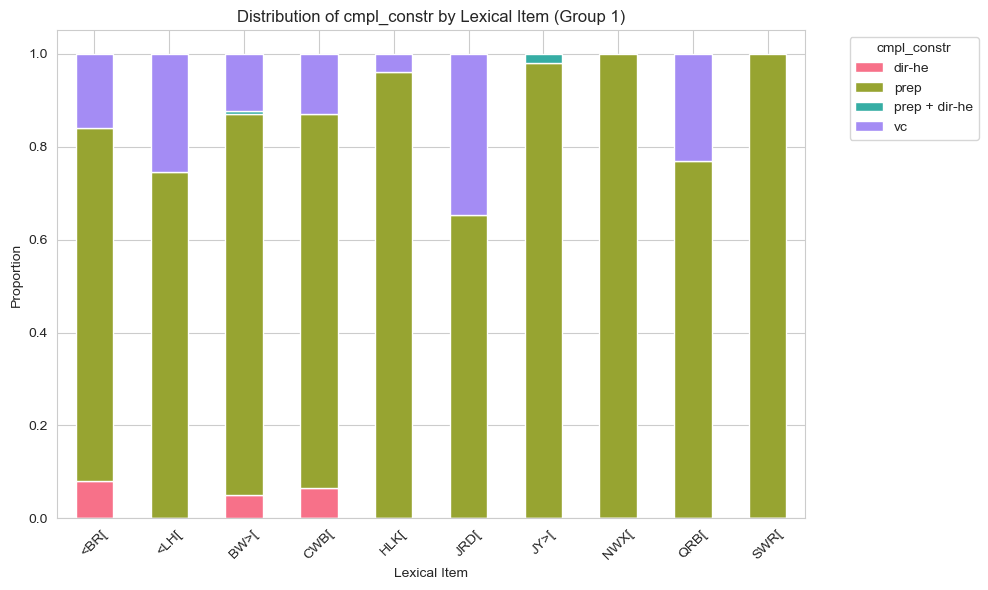

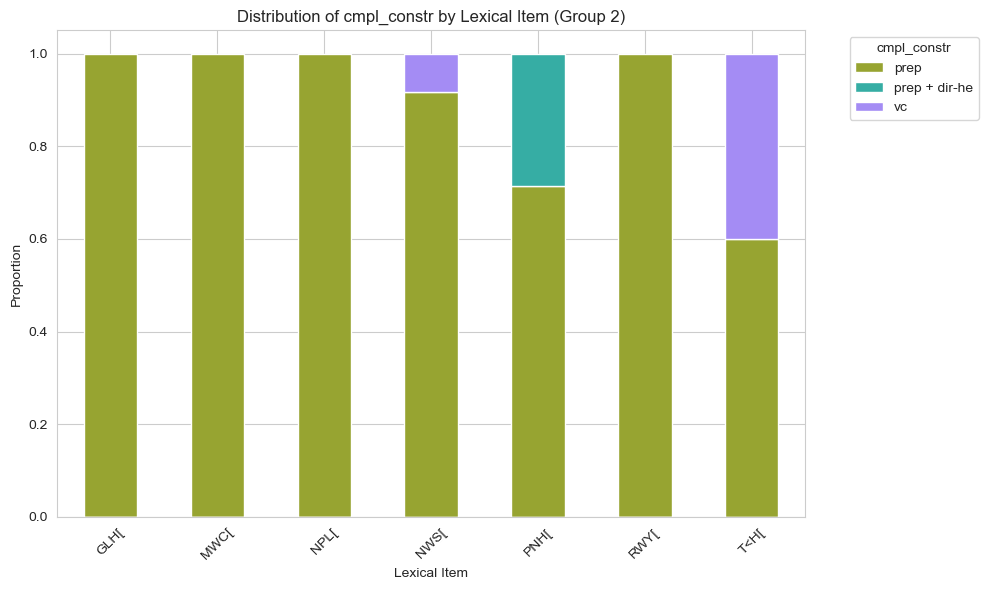

In [32]:
### VISUALISE THE LEXEMES 5+ AND THE COMPLEMENT CONSTRUCTIONS PER LEXEME ###

# Filter out lexical items with less than 5 occurrences
filtered_data_for_plotting = data.groupby('lex').filter(lambda x: len(x) >= 5)

# Get the unique lexical items from the filtered dataset, sorted by frequency
filtered_unique_lex = filtered_data_for_plotting['lex'].value_counts().index.tolist()

# Determine the number of plots needed for the filtered lexical items
filtered_num_plots = ceil(len(filtered_unique_lex) / 10)

# Iterate over the groups of filtered lexical items and plot with custom colors
for i in range(filtered_num_plots):
    start_index = i * 10
    end_index = start_index + 10
    filtered_lex_group = filtered_unique_lex[start_index:end_index]
    plot_lex_groups_custom_colors(filtered_lex_group, i + 1, cmpl_constr_colors)


In [39]:
### CHI SQUARE OF INDEPENDENCE COMPLEMENT CONSTRUCTION AND LEXEME ###
#(with more than 5 occurrences)

from scipy.stats import chi2_contingency

# Function to perform Chi-square test and return the results
def chi_square_test(data, var1, var2):
    """
    Performs a Chi-square test of independence between two categorical variables.

    Parameters:
    - data: pandas DataFrame containing the data.
    - var1: str, the first variable for the test.
    - var2: str, the second variable for the test.

    Returns:
    A tuple containing the Chi-square statistic, p-value, and degrees of freedom.
    """
    # Create a cross-tabulation table
    crosstab = pd.crosstab(data[var1], data[var2])
    
    # Perform the Chi-square test
    chi2, p, dof, _ = chi2_contingency(crosstab)
    
    return chi2, p, dof

# Filter out lexical items with less than 5 occurrences
filtered_lex_data = data.groupby('lex').filter(lambda x: len(x) >= 5)

# Perform the Chi-square test for the filtered dataset
chi2_filtered_lex, p_filtered_lex, dof_filtered_lex = chi_square_test(filtered_lex_data, 'lex', 'cmpl_constr')

# Display the results of the Chi-square test
chi_square_results_filtered_lex = {
    'Chi-square Statistic': chi2_filtered_lex,
    'p-value': p_filtered_lex,
    'Degrees of Freedom': dof_filtered_lex
}

chi_square_results_filtered_lex

{'Chi-square Statistic': 147.05699972050664,
 'p-value': 5.523222250790071e-12,
 'Degrees of Freedom': 48}

### Chi-square Test of Independence Results

- **Variables**: Lexical Items (`lexeme`) vs. Complement Constructions (`complement construction`)
- **Chi-square Statistic**: 147.057
- **Degrees of Freedom**: 48
- **p-value**: 5.52e-12

#### Interpretation:
The very low p-value indicates a significant association between lexical items and complement constructions, suggesting that the type of lexical item is likely to influence the construction of the complement. With a Chi-square statistic of 147.057 and 48 degrees of freedom, the test provides strong evidence to reject the null hypothesis of independence between these variables.


In [35]:
# Function to perform Chi-square test and return the results
def chi_square_test(data, var1, var2):
    """
    Performs a Chi-square test of independence between two categorical variables.

    Parameters:
    - data: pandas DataFrame containing the data.
    - var1: str, the first variable for the test.
    - var2: str, the second variable for the test.

    Returns:
    A tuple containing the Chi-square statistic, p-value, and degrees of freedom.
    """
    # Create a cross-tabulation table
    crosstab = pd.crosstab(data[var1], data[var2])
    
    # Perform the Chi-square test
    chi2, p, dof, _ = chi2_contingency(crosstab)
    
    return chi2, p, dof

# Variables to test
variables = ['scroll', 'cmpl_anim', 'cmpl_det', 'cmpl_indiv']

# Perform the Chi-square tests and collect results
chi_square_results = {}
for var in variables:
    chi2, p, dof = chi_square_test(data, var, 'cmpl_constr')
    chi_square_results[var] = {'Chi-square Statistic': chi2, 'p-value': p, 'Degrees of Freedom': dof}

# Convert results to DataFrame for better presentation
chi_square_results_df = pd.DataFrame(chi_square_results).transpose()

chi_square_results_df


,Chi-square Statistic,p-value,Degrees of Freedom
scroll,3.995014,6.773512e-01,6.0
cmpl_anim,34.759344,4.797706e-06,6.0
cmpl_det,14.694295,2.277243e-02,6.0
cmpl_indiv,219.564481,2.186511e-38,15.0


### Chi-square Test Results

#### Scroll vs. cmpl_constr:
- **Chi-square Statistic**: 3.995
- **p-value**: 0.677
- **Degrees of Freedom**: 6
- **Interpretation**: With a high p-value, there's no significant evidence to reject the null hypothesis, suggesting that `scroll` and `cmpl_constr` are independent, meaning there might not be a strong association between these variables.

#### cmpl_anim vs. cmpl_constr:
- **Chi-square Statistic**: 34.759
- **p-value**: ~0.000005
- **Degrees of Freedom**: 6
- **Interpretation**: The very low p-value indicates a significant association between `cmpl_anim` and `cmpl_constr`, suggesting that the animacy of the complement may impact its construction.

#### cmpl_det vs. cmpl_constr:
- **Chi-square Statistic**: 14.694
- **p-value**: ~0.022
- **Degrees of Freedom**: 6
- **Interpretation**: With a p-value below the common significance level (0.05), there is evidence to suggest a significant association between `cmpl_det` and `cmpl_constr`, indicating that the determinacy of the complement might influence its construction.

#### cmpl_indiv vs. cmpl_constr:
- **Chi-square Statistic**: 219.564
- **p-value**: ~0.00000000000000022
- **Degrees of Freedom**: 15
- **Interpretation**: The extremely low p-value strongly indicates a significant association between `cmpl_indiv` and `cmpl_constr`, suggesting that the individuation of the complement is likely to have a substantial impact on its construction.
